In [1]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import entropy

In [2]:
# Step 2: Load the Dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

In [3]:
# Display first few rows of the dataset
print("Dataset Preview:\n", df.head())

Dataset Preview:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:

# Step 3: Check for Missing Values (Data Cleaning)
print("\nChecking for missing values:")
print(df.isnull().sum())  # No missing values in this dataset


Checking for missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [5]:
# Step 4: Split Data into Features (X) and Target (y)
X = df.drop(columns=["species"])  # Features: Sepal Length, Sepal Width, Petal Length, Petal Width
y = df["species"]  # Target variable: Species classification

In [6]:

# Step 5: Split into Training and Testing Sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 6: Train the Decision Tree Classifier using Entropy
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)  # Using Entropy for splitting
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [8]:
# Step 7: Make Predictions on the Test Set
y_pred = clf.predict(X_test)

In [9]:
# Step 8: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 1.0


In [10]:
# Step 9: Display the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [11]:

# Step 10: Generate the Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



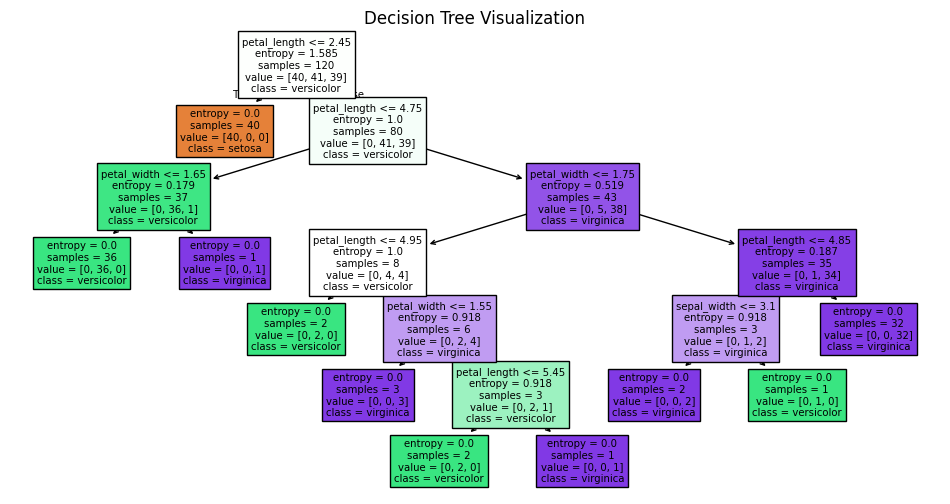

In [12]:
# Step 11: Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [13]:
# Step 12: Compute Entropy of the Entire Dataset
def calculate_entropy(y):
    class_counts = np.bincount(y)
    probabilities = class_counts / len(y)
    return entropy(probabilities, base=2)

In [14]:
# Convert categorical labels to numerical values for entropy calculation
y_numerical = y.factorize()[0]  # Converts species labels to numerical values
print("\nEntropy of the Dataset:", calculate_entropy(y_numerical))


Entropy of the Dataset: 1.584962500721156
